In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
! unzip "/kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z" -d train

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Archive:  /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z or
        /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z.zip, and cannot find /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z.ZIP, period.


In [5]:
!apt-get install p7zip
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/sample_submission.csv.7z

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip is already the newest version (16.02+dfsg-7build1).
p7zip set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 92 not upgraded.
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/mercari-price-suggestion-challenge                                                          1 file, 77912192 bytes (75 MiB)

Extracting archive: /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
--
Path = /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
Type = 7z
Physical 

In [8]:
!unzip '/kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip'
!unzip '/kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip'

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Archive:  /kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip
  inflating: test_stg2.tsv           
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Archive:  /kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
  inflating: sample_submission_stg2.csv  


In [17]:
train = pd.read_csv('train.tsv', sep = '\t')
test = pd.read_csv('test.tsv', sep='\t')

In [7]:
print(train.shape)
print(test.shape)

(1482535, 8)
(693359, 7)


In [7]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [9]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   test_id            693359 non-null  int64 
 1   name               693359 non-null  object
 2   item_condition_id  693359 non-null  int64 
 3   category_name      690301 non-null  object
 4   brand_name         397834 non-null  object
 5   shipping           693359 non-null  int64 
 6   item_description   693359 non-null  object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


Test dataset have 1 less varaible than the training data set, which is the price variable.

### Data Preprocessing

In [12]:
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [13]:
train['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
                                                  ...  
Handmade/Dolls and Miniatures/Primitive               1
Handmade/Pets/Tag                                     1
Handmade/Patterns/Accessories                         1
Home/Kids' Home Store/Nursery Furniture               1
Handmade/Pets/Blanket                                 1
Name: category_name, Length: 1287, dtype: int64

In [14]:
train['brand_name'].value_counts()

PINK                    54088
Nike                    54043
Victoria's Secret       48036
LuLaRoe                 31024
Apple                   17322
                        ...  
The Learning Journey        1
Pampers Baby Fresh          1
Huggies One & Done          1
Classic Media               1
Kids Only                   1
Name: brand_name, Length: 4809, dtype: int64

<AxesSubplot:xlabel='price', ylabel='count'>

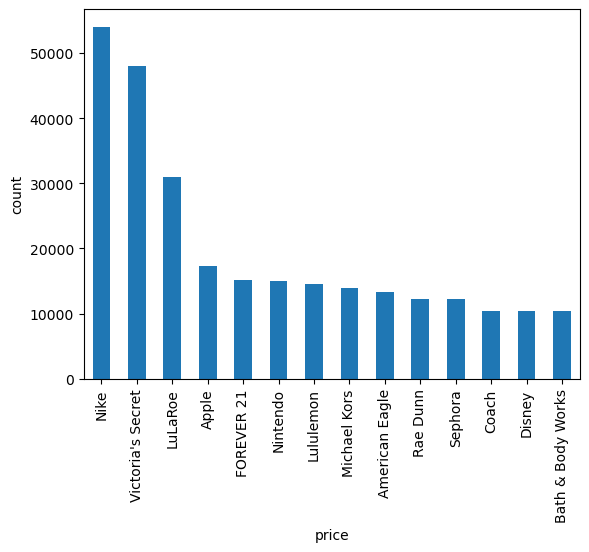

In [15]:
train['brand_name'].value_counts()[1:15].plot(kind="bar",xlabel="price",ylabel="count")

In [15]:
train['brand_name']= train['brand_name'].fillna("No Brand")
train['category_name']= train["category_name"].fillna("No Category")

In [16]:
train.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     4
dtype: int64

In [15]:
train["brand_name"].value_counts()

No Brand                632682
PINK                     54088
Nike                     54043
Victoria's Secret        48036
LuLaRoe                  31024
                         ...  
The Learning Journey         1
Pampers Baby Fresh           1
Huggies One & Done           1
Classic Media                1
Kids Only                    1
Name: brand_name, Length: 4810, dtype: int64

In [16]:
train['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
                                                  ...  
Handmade/Dolls and Miniatures/Primitive               1
Handmade/Pets/Tag                                     1
Handmade/Patterns/Accessories                         1
Home/Kids' Home Store/Nursery Furniture               1
Handmade/Pets/Blanket                                 1
Name: category_name, Length: 1288, dtype: int64

In [19]:
price = train['price']

In [21]:
train["price"]

0          10.0
1          52.0
2          10.0
3          35.0
4          44.0
           ... 
1482530    20.0
1482531    14.0
1482532    12.0
1482533    45.0
1482534    22.0
Name: price, Length: 1482535, dtype: float64

In [22]:
price

0          10.0
1          52.0
2          10.0
3          35.0
4          44.0
           ... 
1482530    20.0
1482531    14.0
1482532    12.0
1482533    45.0
1482534    22.0
Name: price, Length: 1482535, dtype: float64

In [23]:
price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [24]:
print("Mean:" ,np.mean(price))
print("Std:" ,np.std(price))

Mean: 26.737516146330442
Std: 38.58605329976577


In [25]:
print("Max:" ,max(price))
print("Min:" ,min(price))

Max: 2009.0
Min: 0.0


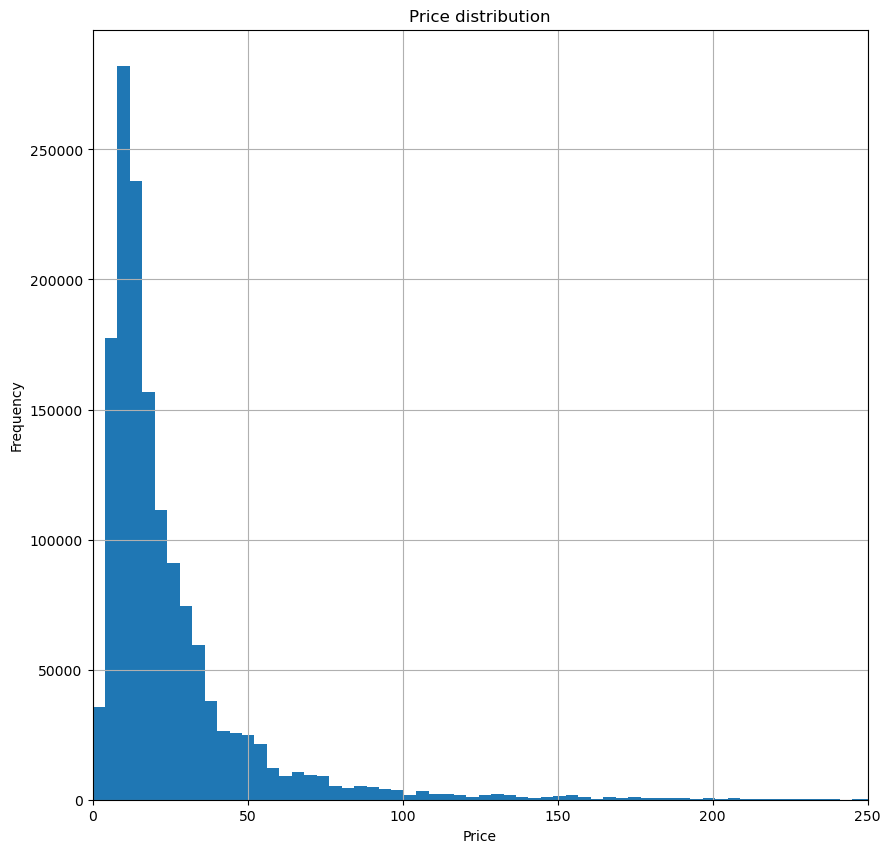

In [26]:
price.hist(bins=500, figsize=(10,10))
plt.xlim(0,250)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price distribution")
plt.show()

<AxesSubplot:xlabel='price', ylabel='count'>

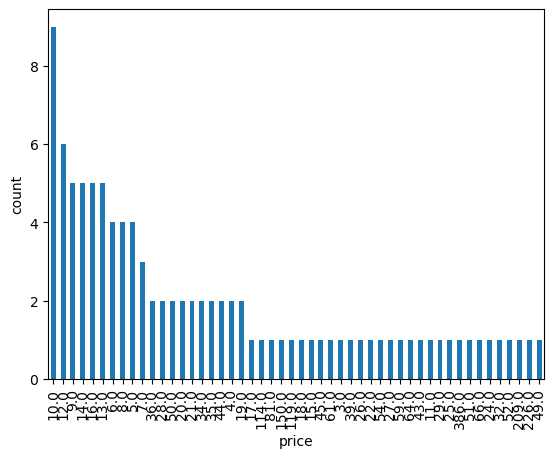

In [28]:
train['price'][:100].value_counts().plot(kind="bar",xlabel="price",ylabel="count")

In [29]:
train.nunique()

train_id             1482535
name                 1225273
item_condition_id          5
category_name           1288
brand_name              4810
price                    828
shipping                   2
item_description     1281426
dtype: int64

In [31]:
# unique brand 
train["brand_name"].nunique()

4810

### category

In [17]:
# unique category
train["category_name"].nunique()

1288

In [8]:
train[["general_cat", "subcat1",'subcat2','subcat3','subcat4']] = train.category_name.str.split("/", expand = True)

In [9]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,subcat3,subcat4
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,None,None
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,None,None
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,None,None
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,None,None
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf,None,None
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,None,None
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories,None,None
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents,None,None


In [10]:
train=train.drop(['subcat3','subcat4'],axis=1)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482535 entries, 0 to 1482534
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482535 non-null  object 
 8   general_cat        1476208 non-null  object 
 9   subcat1            1476208 non-null  object 
 10  subcat2            1476208 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 135.7+ MB


In [40]:
train['general_cat'].value_counts()

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Name: general_cat, dtype: int64

In [24]:
train['general_cat'].unique().tolist()

['Men',
 'Electronics',
 'Women',
 'Home',
 'Sports & Outdoors',
 'Vintage & Collectibles',
 'Beauty',
 'Other',
 'Kids',
 'No Category',
 'Handmade']

In [25]:
# make dictionary, assign number to different category

gen_cat0={'Men':1,
          'Electronics':2,
          'Women':3,
          'Home':4,
          'Sports & Outdoors':5,
          'Vintage & Collectibles':6,
          'Beauty':7,
          'Kids':8,
          'Handmade':9,
          'No Category':10,
          'Other':11}

In [26]:
gen_cat0

{'Men': 1,
 'Electronics': 2,
 'Women': 3,
 'Home': 4,
 'Sports & Outdoors': 5,
 'Vintage & Collectibles': 6,
 'Beauty': 7,
 'Kids': 8,
 'Handmade': 9,
 'No Category': 10,
 'Other': 11}

In [27]:
gen_cat_inverse=dict(zip(gen_cat0.values(),gen_cat0.keys()))

In [28]:
gen_cat_inverse

{1: 'Men',
 2: 'Electronics',
 3: 'Women',
 4: 'Home',
 5: 'Sports & Outdoors',
 6: 'Vintage & Collectibles',
 7: 'Beauty',
 8: 'Kids',
 9: 'Handmade',
 10: 'No Category',
 11: 'Other'}

In [29]:
train['general_cat'].value_counts()

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
No Category                 6327
Name: general_cat, dtype: int64

In [21]:
# percentage
train['general_cat'].value_counts()/len(train)*100

Women                     44.814119
Beauty                    14.018421
Kids                      11.580772
Electronics                8.275690
Men                        6.318906
Home                       4.578037
Vintage & Collectibles     3.138543
Other                      3.059017
Handmade                   2.080356
Sports & Outdoors          1.709369
No Category                0.426769
Name: general_cat, dtype: float64

<AxesSubplot:xlabel='General cat', ylabel='count'>

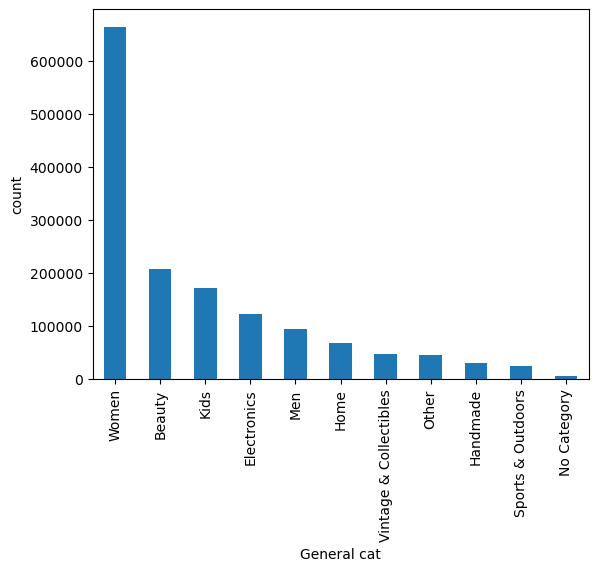

In [31]:
train['general_cat'].value_counts().plot(kind="bar",xlabel="General cat",ylabel="count")

In [54]:
# count the category
train['subcat1'].value_counts()

Athletic Apparel        134383
Makeup                  124624
Tops & Blouses          106960
Shoes                   100452
Jewelry                  61763
                         ...  
Candles                     64
Ceramics and Pottery        57
Dolls and Miniatures        49
Books and Zines             46
Quilts                      31
Name: subcat1, Length: 113, dtype: int64

In [55]:
train['subcat1'].value_counts()/len(train)

Athletic Apparel        0.090644
Makeup                  0.084061
Tops & Blouses          0.072147
Shoes                   0.067757
Jewelry                 0.041660
                          ...   
Candles                 0.000043
Ceramics and Pottery    0.000038
Dolls and Miniatures    0.000033
Books and Zines         0.000031
Quilts                  0.000021
Name: subcat1, Length: 113, dtype: float64

In [56]:
train['subcat1'].value_counts()[:20]

Athletic Apparel             134383
Makeup                       124624
Tops & Blouses               106960
Shoes                        100452
Jewelry                       61763
Toys                          58158
Cell Phones & Accessories     53290
Women's Handbags              45862
Dresses                       45758
Women's Accessories           42350
Jeans                         36130
Video Games & Consoles        35971
Sweaters                      35752
Underwear                     33784
Skin Care                     29838
Home Décor                    25188
Fragrance                     24294
Kitchen & Dining              21954
Tops                          20591
Other                         20017
Name: subcat1, dtype: int64

<AxesSubplot:xlabel='subcat1', ylabel='count'>

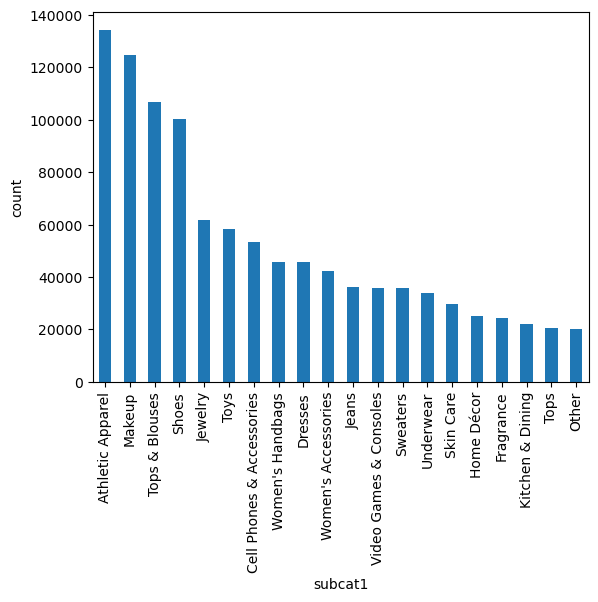

In [57]:
train['subcat1'].value_counts()[0:20].plot(kind="bar",xlabel="subcat1",ylabel="count")

In [43]:
train['subcat2'].value_counts()

Pants, Tights, Leggings    60177
Other                      50224
Face                       50171
T-Shirts                   46380
Shoes                      32168
                           ...  
St Patricks                    1
Garbage Disposals              1
Decorating                     1
Pet Food                       1
Ephemera                       1
Name: subcat2, Length: 870, dtype: int64

In [37]:
train['subcat3'].value_counts()

Tablet           3059
Ballet            598
Outdoor Games     413
Bomber            273
Baseball           44
Serving             2
Name: subcat3, dtype: int64

In [38]:
train['subcat4'].value_counts()

eBook Readers    1986
eBook Access     1073
Name: subcat4, dtype: int64

In [8]:
print("Hello future")

Hello future


In [9]:
train_new = train['category_name'].str.split('/', expand=True)

In [28]:
train_new

,0,1,2,3,4
0,Men,Tops,T-shirts,None,None
1,Electronics,Computers & Tablets,Components & Parts,None,None
2,Women,Tops & Blouses,Blouse,None,None
3,Home,Home Décor,Home Décor Accents,None,None
4,Women,Jewelry,Necklaces,None,None
...,...,...,...,...,...
1482530,Women,Dresses,Mid-Calf,None,None
1482531,Kids,Girls 2T-5T,Dresses,None,None
1482532,Sports & Outdoors,Exercise,Fitness accessories,None,None
1482533,Home,Home Décor,Home Décor Accents,None,None


### item condition

In [11]:
train['item_condition_id'].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

In [50]:
train['item_condition_id'].value_counts()/len(train)

1    0.432063
3    0.291501
2    0.253268
4    0.021559
5    0.001608
Name: item_condition_id, dtype: float64

<AxesSubplot:title={'center':'item condition distribution'}, xlabel='item condition', ylabel='frequency'>

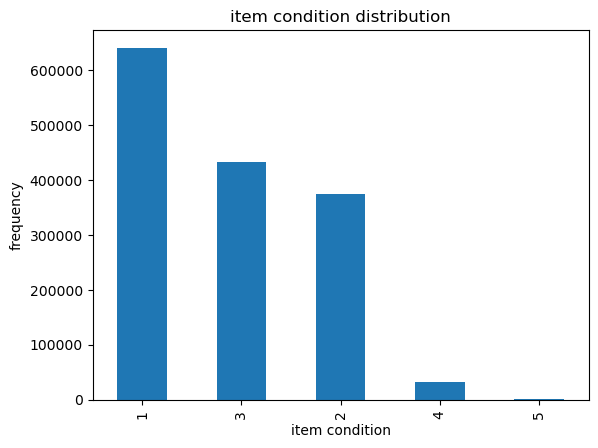

In [76]:
train['item_condition_id'].value_counts().plot(kind="bar",xlabel="item condition",ylabel="frequency",title="item condition distribution")

It did not provide the information on what the ordinality is

{'whiskers': [<matplotlib.lines.Line2D at 0x7f89aac42050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f89aac42690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f89aab87d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f89aac42d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f89bf8a70d0>],
 'means': []}

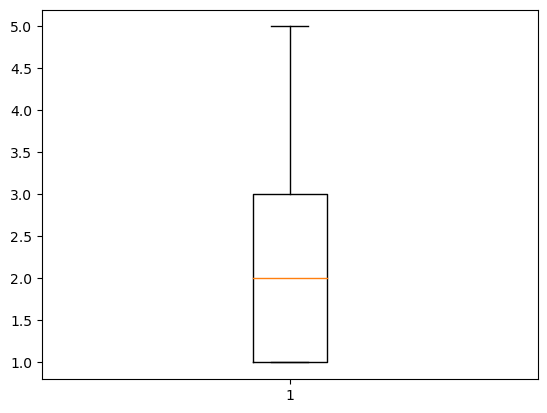

In [47]:
# price distribution of item condition
plt.boxplot(train['item_condition_id'])

In [48]:
list((train['item_condition_id'].value_counts()))

[640549, 432161, 375479, 31962, 2384]

In [49]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,subcat3,subcat4
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,No Brand,10.0,1,No description yet,Men,Tops,T-shirts,None,None
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,None,None
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,None,None
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,None,None
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,None,None


### shipping

<AxesSubplot:xlabel='shipping', ylabel='count'>

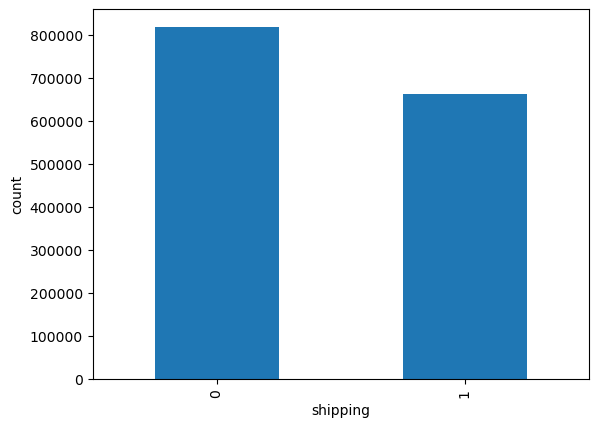

In [84]:
train['shipping'].value_counts().plot(kind="bar",xlabel="shipping",ylabel="count")

- 0: shipping provided by seller
- 1: buyer need to pay for shipping

In [77]:
# shipping matter? shipping affect price?
train['shipping'].value_counts()/len(train)

0    0.552726
1    0.447274
Name: shipping, dtype: float64

In [89]:
seller_s = train.loc[train.shipping==1, 'price']
buyer_s = train.loc[train.shipping==0, 'price']

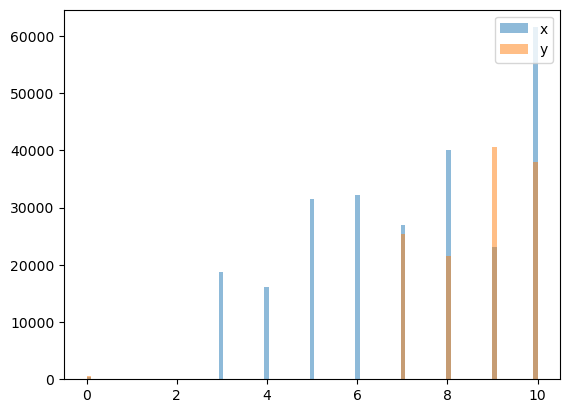

In [95]:
bins = np.linspace(0,10,100)
plt.hist(seller_s, bins, alpha=0.5, label='x')
plt.hist(buyer_s, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

### item description

clean the item description text
1. excluding filling/stop words in the description column
1. lower case/upper case
1. punctuation


In [32]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,subcat3,subcat4
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,No Brand,10.0,1,No description yet,Men,Tops,T-shirts,None,None
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,None,None
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,None,None
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,None,None
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf,None,None
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,None,None
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,No Brand,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories,None,None
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,No Brand,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents,None,None


In [177]:
from wordcloud import WordCloud

(-0.5, 1439.5, 1079.5, -0.5)

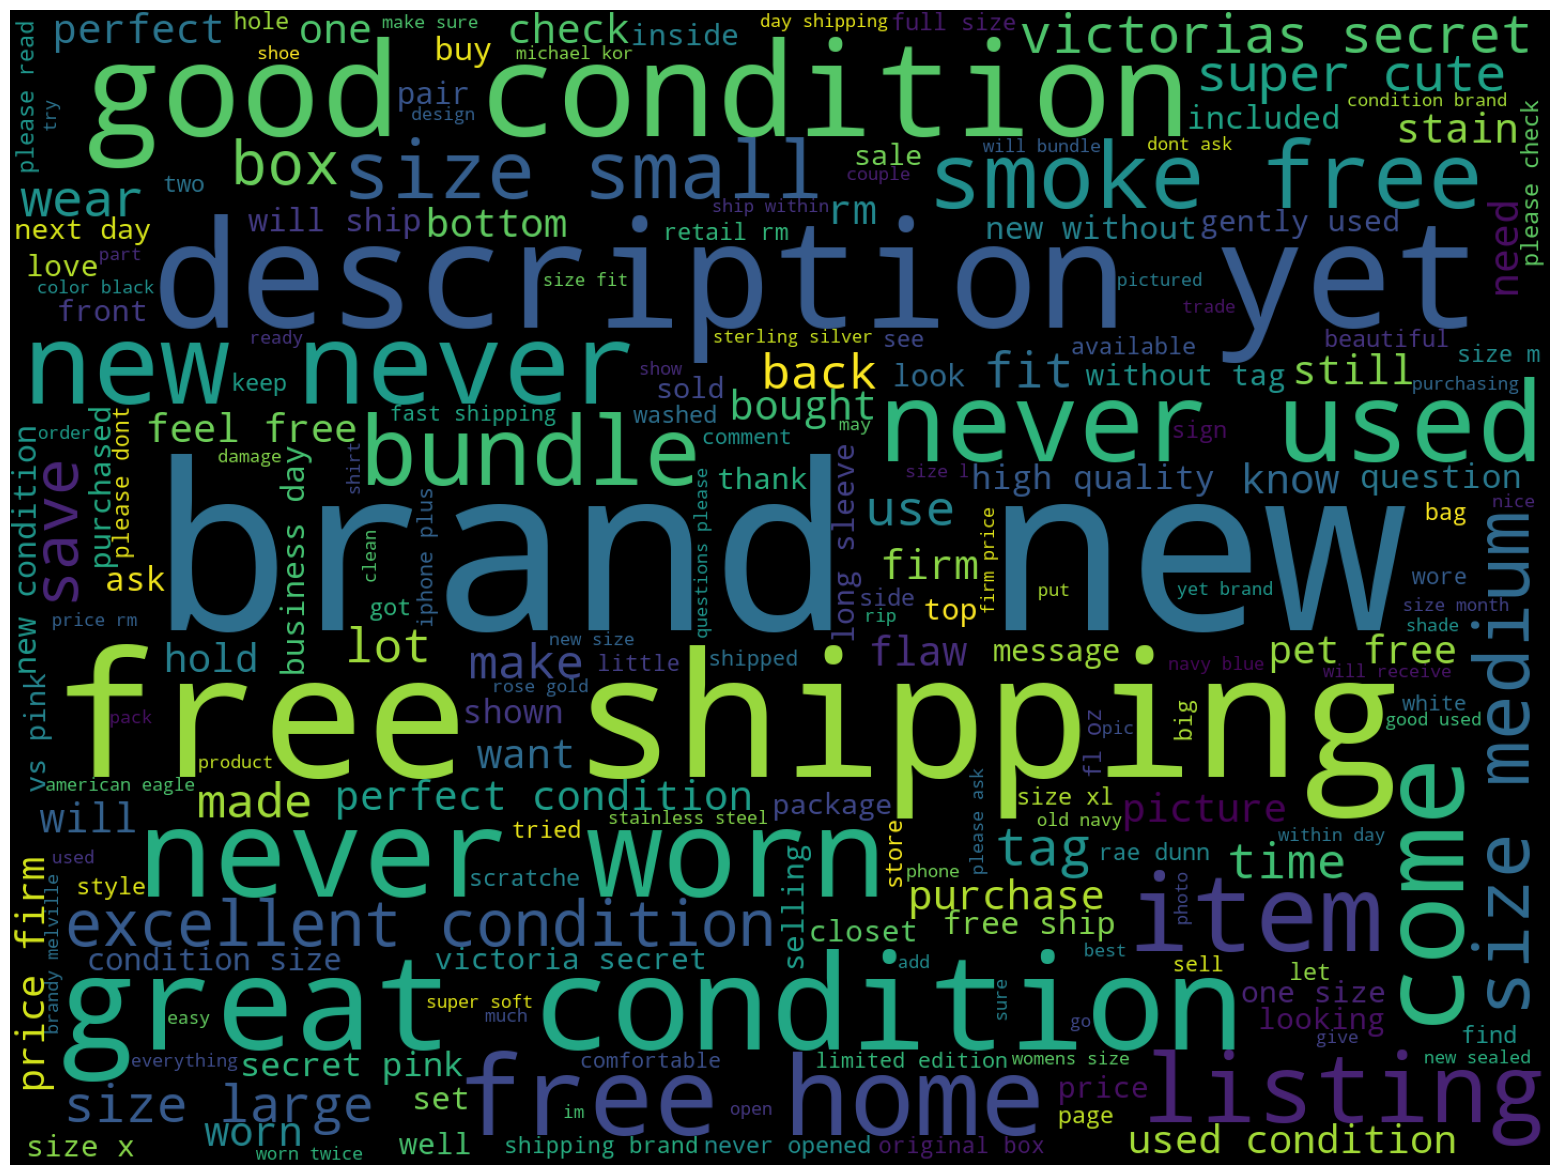

In [178]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train['item_description']
.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
train = pd.read_csv('train.tsv', sep = '\t')
test = pd.read_csv('test.tsv', sep='\t')

In [153]:
des=train['item_description'].tolist()

In [34]:
train.shape

(1482535, 11)

In [12]:
# checking for missing value
train['item_description'].isnull().sum()

4

In [13]:
# remove the missing values since there's only 4 of them
train = train[pd.notnull(train['item_description'])]

In [14]:
train['item_description'].isnull().sum()

0

In [15]:
train.shape

(1482531, 11)

In [56]:
print(train["item_description"].iloc[2:3])

2    adorable top with a hint of lace and a key hol...
Name: item_description, dtype: object


In [16]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


In [11]:
# natural language toolkit (nltk)
import string
from nltk.corpus import stopwords
import nltk
import re
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [18]:
# convert everything into lowercase
train['item_description']=train['item_description'].str.lower()
train['name']=train['name'].str.lower()
train['brand_name']=train['brand_name'].str.lower()

In [23]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
# remove punctuation

def remove_pun(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text

In [20]:
# remove stop words
stop = set(stopwords.words('english'))
def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

In [21]:
train['item_description']=train['item_description'].astype(str).apply(remove_pun)
train['item_description']=train['item_description'].astype(str).apply(remove_stop_words)

In [22]:
train['item_description']

0                                            description yet
1          keyboard great condition works like came box p...
2          adorable top hint lace key hole back pale pink...
3          new tags leather horses retail rm stand foot h...
4                          complete certificate authenticity
                                 ...                        
1482530    lace says size small fits medium perfectly nev...
1482531     little mermaid handmade dress never worn size 2t
1482532                         used twice still great shape
1482533    2 one see 2 red 2 orange 2 big red orange ones...
1482534         new tag red sparkle firm price free shipping
Name: item_description, Length: 1482531, dtype: object

In [23]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2
0,0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,NaN,10.0,1,description yet,Men,Tops,T-shirts
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,keyboard great condition works like came box p...,Electronics,Computers & Tablets,Components & Parts
2,2,ava-viv blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,adorable top hint lace key hole back pale pink...,Women,Tops & Blouses,Blouse
3,3,leather horse statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,new tags leather horses retail rm stand foot h...,Home,Home Décor,Home Décor Accents
4,4,24k gold plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,complete certificate authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,free people inspired dress,2,Women/Dresses/Mid-Calf,free people,20.0,1,lace says size small fits medium perfectly nev...,Women,Dresses,Mid-Calf
1482531,1482531,little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,disney,14.0,0,little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,used twice still great shape,Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,world markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,2 one see 2 red 2 orange 2 big red orange ones...,Home,Home Décor,Home Décor Accents


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1482535 non-null  object 
 4   brand_name         1482535 non-null  object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
 8   general_cat        1482535 non-null  object 
 9   subcat1            1476208 non-null  object 
 10  subcat2            1476208 non-null  object 
 11  subcat3            4389 non-null     object 
 12  subcat4            3059 non-null     object 
dtypes: float64(1), int64(3), object(9)
memory usage: 147.0+ MB


In [64]:
# excluding filling/stop words in the description column
stop_words=stopwords.words("english")

In [65]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [66]:
train['item_description']

0                                         no description yet
1          this keyboard is in great condition and works ...
2          adorable top with a hint of lace and a key hol...
3          new with tags leather horses retail for rm eac...
4                  complete with certificate of authenticity
                                 ...                        
1482530    lace says size small but fits medium perfectly...
1482531     little mermaid handmade dress never worn size 2t
1482532              used once or twice still in great shape
1482533    there is 2 of each one that you see so 2 red 2...
1482534    new with tag red with sparkle firm price no fr...
Name: item_description, Length: 1482531, dtype: object

In [67]:
len(stop_words)

179

After cleaning, prepare the text in these steps before put it into the model:
- tokenization - splitting text into words
- stemming - removing the ending of the word (getting the root word)
- lemmazation - similar to stemming, but instead of cutting the ending of the word, this consider the original word meaning, more expensive


In [24]:
# tookenization 
def tokenize(text):
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        text = regex.sub(" ", text) # remove punctuation
        
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=3]
        
        return filtered_tokens
            
    except TypeError as e: print(text,e)

In [25]:
%%time
train['tokens'] = train['item_description'].map(tokenize)

CPU times: user 5min 6s, sys: 2.14 s, total: 5min 8s
Wall time: 5min 8s


In [26]:
train.reset_index(drop=True, inplace=True)

In [27]:
train.shape

(1482531, 12)

In [26]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2
0,0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,NaN,10.0,1,no description yet,Men,Tops,T-shirts
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,this keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,ava-viv blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,leather horse statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,new with tags. leather horses. retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24k gold plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,free people inspired dress,2,Women/Dresses/Mid-Calf,free people,20.0,1,"lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,disney,14.0,0,little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,world markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,there is 2 of each one that you see! so 2 red ...,Home,Home Décor,Home Décor Accents


In [28]:
for description, tokens in zip(train['item_description'].head(),
                              train['tokens'].head()):
    print('description:', description)
    print('tokens:', tokens)
    print()

description: description yet
tokens: ['description', 'yet']

description: keyboard great condition works like came box ports tested work perfectly lights customizable via razer synapse app pc
tokens: ['keyboard', 'great', 'condition', 'works', 'like', 'came', 'box', 'ports', 'tested', 'work', 'perfectly', 'lights', 'customizable', 'via', 'razer', 'synapse', 'app']

description: adorable top hint lace key hole back pale pink 1x also 3x available white
tokens: ['adorable', 'top', 'hint', 'lace', 'key', 'hole', 'back', 'pale', 'pink', 'also', 'available', 'white']

description: new tags leather horses retail rm stand foot high sold pair questions please ask free shipping got storage
tokens: ['new', 'tags', 'leather', 'horses', 'retail', 'stand', 'foot', 'high', 'sold', 'pair', 'questions', 'please', 'ask', 'free', 'shipping', 'got', 'storage']

description: complete certificate authenticity
tokens: ['complete', 'certificate', 'authenticity']



In [37]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # lowercase the text
    text = text.lower()
    # remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # remove stop words
    return text

In [39]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,subcat3,subcat4,desc_len,tokens,token2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,No Brand,10.0,1,no description yet,Men,Tops,T-shirts,None,None,0,"[description, yet]",no description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,this keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,None,None,0,"[keyboard, great, condition, works, like, came...",this keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,None,None,0,"[adorable, top, hint, lace, key, hole, back, p...",adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand,35.0,1,new with tags. leather horses. retail for [rm]...,Home,Home Décor,Home Décor Accents,None,None,0,"[new, tags, leather, horses, retail, stand, fo...",new with tags leather horses retail for rm eac...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand,44.0,0,complete with certificate of authenticity,Women,Jewelry,Necklaces,None,None,0,"[complete, certificate, authenticity]",complete with certificate of authenticity


In [53]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,subcat3,subcat4,desc_len,tokens,token2,token3,token4
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,No Brand,10.0,1,no description yet,Men,Tops,T-shirts,None,None,0,"[description, yet]",no description yet,no description yet,no description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,this keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,None,None,0,"[keyboard, great, condition, works, like, came...",this keyboard is in great condition and works ...,this keyboard is in great condition and work l...,this keyboard is in great condition and work l...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,None,None,0,"[adorable, top, hint, lace, key, hole, back, p...",adorable top with a hint of lace and a key hol...,adorable top with a hint of lace and a key hol...,adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand,35.0,1,new with tags. leather horses. retail for [rm]...,Home,Home Décor,Home Décor Accents,None,None,0,"[new, tags, leather, horses, retail, stand, fo...",new with tags leather horses retail for rm eac...,new with tag leather horse retail for rm each ...,new with tag leather horse retail for rm each ...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand,44.0,0,complete with certificate of authenticity,Women,Jewelry,Necklaces,None,None,0,"[complete, certificate, authenticity]",complete with certificate of authenticity,complete with certificate of authenticity,complete with certificate of authenticity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482526,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf,None,None,0,"[lace, says, size, small, fits, medium, perfec...",lace says size small but fits medium perfectly...,lace say size small but fit medium perfectly t...,lace say size small but fit medium perfectly t...
1482527,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,None,None,0,"[little, mermaid, handmade, dress, never, worn...",little mermaid handmade dress never worn size t,little mermaid handmade dress never worn size t,little mermaid handmade dress never worn size t
1482528,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,No Brand,12.0,0,"used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories,None,None,0,"[used, twice, still, great, shape]",used once or twice still in great shape,used once or twice still in great shape,used once or twice still in great shape
1482529,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,No Brand,45.0,1,there is 2 of each one that you see! so 2 red ...,Home,Home Décor,Home Décor Accents,None,None,0,"[one, see, red, orange, big, red, orange, ones...",there is of each one that you see so red or...,there is of each one that you see so red orang...,there is of each one that you see so red orang...


In [47]:
train['desc_len'].value_counts()[:50]

0    1482531
Name: desc_len, dtype: int64

<AxesSubplot:xlabel='word length', ylabel='count'>

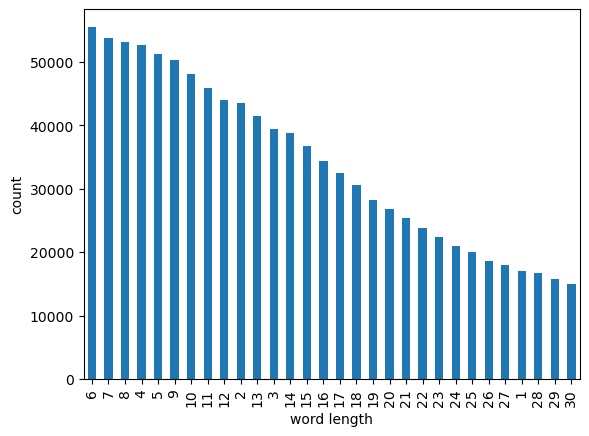

In [189]:
train['desc_len'].value_counts()[1:31].plot(kind="bar",xlabel="word length",ylabel="count")

In [40]:
train.shape

(1482531, 14)

In [29]:
train_copy = train.copy()

In [30]:
train_copy

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,tokens
0,0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,NaN,10.0,1,description yet,Men,Tops,T-shirts,"[description, yet]"
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,keyboard great condition works like came box p...,Electronics,Computers & Tablets,Components & Parts,"[keyboard, great, condition, works, like, came..."
2,2,ava-viv blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,adorable top hint lace key hole back pale pink...,Women,Tops & Blouses,Blouse,"[adorable, top, hint, lace, key, hole, back, p..."
3,3,leather horse statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,new tags leather horses retail rm stand foot h...,Home,Home Décor,Home Décor Accents,"[new, tags, leather, horses, retail, stand, fo..."
4,4,24k gold plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,complete certificate authenticity,Women,Jewelry,Necklaces,"[complete, certificate, authenticity]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1482526,1482530,free people inspired dress,2,Women/Dresses/Mid-Calf,free people,20.0,1,lace says size small fits medium perfectly nev...,Women,Dresses,Mid-Calf,"[lace, says, size, small, fits, medium, perfec..."
1482527,1482531,little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,disney,14.0,0,little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,"[little, mermaid, handmade, dress, never, worn..."
1482528,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,used twice still great shape,Sports & Outdoors,Exercise,Fitness accessories,"[used, twice, still, great, shape]"
1482529,1482533,world markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,2 one see 2 red 2 orange 2 big red orange ones...,Home,Home Décor,Home Décor Accents,"[one, see, red, orange, big, red, orange, ones..."


In [57]:
train_copy

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,tokens
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,No Brand,10.0,1,No description yet,Men,Tops,T-shirts,"[description, yet]"
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,"[keyboard, great, condition, works, like, came..."
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,"[adorable, top, hint, lace, key, hole, back, p..."
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,"[new, tags, leather, horses, retail, stand, fo..."
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,"[complete, certificate, authenticity]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1482526,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf,"[lace, says, size, small, fits, medium, perfec..."
1482527,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,"[little, mermaid, handmade, dress, never, worn..."
1482528,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,No Brand,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories,"[used, twice, still, great, shape]"
1482529,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,No Brand,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents,"[one, see, red, orange, big, red, orange, ones..."


In [61]:
train_copy.shape

(1482531, 12)

In [31]:
from sklearn import preprocessing

In [32]:
def to_num(data,to):
    if train_copy[data].dtype == type(object):
        le = preprocessing.LabelEncoder()
        train_copy[to] = le.fit_transform(train_copy[data].astype(str))   

In [67]:
to_num('name','n_name')
to_num('category_name','n_category_name')
to_num('brand_name','n_brand_name')
to_num('general_cat','n_general_cat')
to_num('subcat1','n_subcat1')
to_num('subcat2','n_subcat2')

In [68]:
train_copy.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,tokens,n_name,n_category_name,n_brand_name,n_general_cat,n_subcat1,n_subcat2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,No Brand,10.0,1,No description yet,Men,Tops,T-shirts,"[description, yet]",640807,808,3072,5,103,763
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,"[keyboard, great, condition, works, like, came...",903930,86,3558,1,30,212
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,"[adorable, top, hint, lace, key, hole, back, p...",91532,1255,4181,10,104,94
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,"[new, tags, leather, horses, retail, stand, fo...",561141,485,3072,3,55,404
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,"[complete, certificate, authenticity]",45483,1182,3072,10,58,536


In [69]:
train_copy.shape

(1482531, 18)

### Model selection
this is a regression task, and we are giving recommendation to the seller about the sales price of an item based off the item description.

- Ridge regression
- lgbm regression
- LDA 



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482531 entries, 0 to 1482530
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482531 non-null  int64  
 1   name               1482531 non-null  object 
 2   item_condition_id  1482531 non-null  int64  
 3   category_name      1482531 non-null  object 
 4   brand_name         1482531 non-null  object 
 5   price              1482531 non-null  float64
 6   shipping           1482531 non-null  int64  
 7   item_description   1482531 non-null  object 
 8   general_cat        1482531 non-null  object 
 9   subcat1            1476204 non-null  object 
 10  subcat2            1476204 non-null  object 
 11  tokens             1482531 non-null  object 
 12  n_name             1482531 non-null  int64  
 13  n_category_name    1482531 non-null  int64  
 14  n_brand_name       1482531 non-null  int64  
 15  n_general_cat      1482531 non-n

In [72]:
train_new = train_copy[['item_condition_id','shipping','n_name','n_brand_name','n_general_cat','n_subcat1','n_subcat2']]

In [81]:
# split data
x_train, x_test, y_train, y_test = train_test_split(train_new, train['price'], test_size=0.25, random_state=12345)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1111898, 7), (370633, 7), (1111898,), (370633,))

In [82]:
x_train

,item_condition_id,shipping,n_name,n_brand_name,n_general_cat,n_subcat1,n_subcat2
1280743,1,1,220335,1259,5,76,166
205894,1,1,245080,3072,0,63,500
1003701,3,0,430373,1265,4,47,693
605700,3,0,535420,3072,7,14,559
1452478,1,1,650140,3842,0,90,301
...,...,...,...,...,...,...,...
1134974,3,1,1145764,3067,1,109,346
896425,3,0,812597,3072,10,104,762
1396132,2,1,21257,3072,4,17,555
1443969,3,0,974309,3072,9,7,492


In [78]:
y_train

1049835    31.0
651128     14.0
1136223    29.0
583193     12.0
311892     45.0
           ... 
836489      5.0
491263     19.0
470924     30.0
491755     17.0
128037     16.0
Name: price, Length: 1111898, dtype: float64

In [86]:
X_train, x_test, Y_train, y_test = train_test_split(train_new, train_copy['price'], test_size=0.25, random_state=12345)

#### ridge regression

In [80]:
from sklearn import linear_model

In [116]:
ridge = linear_model.Ridge()
ridge.fit(x_train, y_train)
ypredition_ridge = ridge.predict(x_test)
ridge_score = ridge.score(x_test, y_test)
print(f"r square score for ridge regression is: {ridge_score}")

r square score for ridge score is: 0.01520731465007863


In [81]:
import lightgbm

In [121]:
lgbm = lightgbm.LGBMRegressor()
lgbm.fit(x_train, y_train)
ypredition_lgbm = lgbm.predict(x_test)
lgbm_score = lgbm.score(x_test,y_test)
print(f"r2 score lgmb regression is: {lgbm_score}")

r2 score lgmb regression is: 0.30658179426915955


In [34]:
train1=train.drop(['tokens'],axis=1)

train1

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2
0,0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,NaN,10.0,1,description yet,Men,Tops,T-shirts
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,keyboard great condition works like came box p...,Electronics,Computers & Tablets,Components & Parts
2,2,ava-viv blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,adorable top hint lace key hole back pale pink...,Women,Tops & Blouses,Blouse
3,3,leather horse statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,new tags leather horses retail rm stand foot h...,Home,Home Décor,Home Décor Accents
4,4,24k gold plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,complete certificate authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482526,1482530,free people inspired dress,2,Women/Dresses/Mid-Calf,free people,20.0,1,lace says size small fits medium perfectly nev...,Women,Dresses,Mid-Calf
1482527,1482531,little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,disney,14.0,0,little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482528,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,used twice still great shape,Sports & Outdoors,Exercise,Fitness accessories
1482529,1482533,world markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,2 one see 2 red 2 orange 2 big red orange ones...,Home,Home Décor,Home Décor Accents


In [102]:
combine = pd.concat([train,test])
train_size = len(train)
submission = test[['test_id']]

In [37]:
combine

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,test_id
0,0.0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,NaN,10.0,1,description yet,Men,Tops,T-shirts,NaN
1,1.0,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,keyboard great condition works like came box p...,Electronics,Computers & Tablets,Components & Parts,NaN
2,2.0,ava-viv blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,adorable top hint lace key hole back pale pink...,Women,Tops & Blouses,Blouse,NaN
3,3.0,leather horse statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,new tags leather horses retail rm stand foot h...,Home,Home Décor,Home Décor Accents,NaN
4,4.0,24k gold plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,complete certificate authenticity,Women,Jewelry,Necklaces,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
693354,NaN,Quartz crystal on Flint stone,1,Home/Home Décor/Home Décor Accents,NaN,NaN,0,Flint/Quartz cluster. Self mined ✨measures 3x2...,NaN,NaN,NaN,693354.0
693355,NaN,It Cosmetics - Travel Bundle,1,Beauty/Makeup/Makeup Sets,IT Cosmetics,NaN,1,It Cosmetics travel bundle. Includes: Brow pow...,NaN,NaN,NaN,693355.0
693356,NaN,Galaxy S8 hard shell case,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,NaN,1,New. Free shipping Basstop case,NaN,NaN,NaN,693356.0
693357,NaN,Hi low floral kimono,2,Women/Swimwear/Cover-Ups,NaN,NaN,0,Floral kimono. Tropical print. Open front. Hi ...,NaN,NaN,NaN,693357.0


In [38]:
combine['item_description']=combine['item_description'].str.lower()
combine['name']=combine['name'].str.lower()
combine['brand_name']=combine['brand_name'].str.lower()

combine['item_description']=combine['item_description'].apply(remove_pun)
combine['item_description']=combine['item_description'].apply(remove_stop_words)

In [39]:
combine

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,test_id
0,0.0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,NaN,10.0,1,description yet,Men,Tops,T-shirts,NaN
1,1.0,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,keyboard great condition works like came box p...,Electronics,Computers & Tablets,Components & Parts,NaN
2,2.0,ava-viv blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,adorable top hint lace key hole back pale pink...,Women,Tops & Blouses,Blouse,NaN
3,3.0,leather horse statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,new tags leather horses retail rm stand foot h...,Home,Home Décor,Home Décor Accents,NaN
4,4.0,24k gold plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,complete certificate authenticity,Women,Jewelry,Necklaces,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
693354,NaN,quartz crystal on flint stone,1,Home/Home Décor/Home Décor Accents,NaN,NaN,0,flintquartz cluster self mined ✨measures 3x2in...,NaN,NaN,NaN,693354.0
693355,NaN,it cosmetics - travel bundle,1,Beauty/Makeup/Makeup Sets,it cosmetics,NaN,1,cosmetics travel bundle includes brow power un...,NaN,NaN,NaN,693355.0
693356,NaN,galaxy s8 hard shell case,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,NaN,1,new free shipping basstop case,NaN,NaN,NaN,693356.0
693357,NaN,hi low floral kimono,2,Women/Swimwear/Cover-Ups,NaN,NaN,0,floral kimono tropical print open front hi low...,NaN,NaN,NaN,693357.0


In [40]:
combine_sample = combine.sample(n=150000)

In [41]:
combine_sample

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,test_id
738470,738471.0,2 hollister sundress,3,"Women/Dresses/Above Knee, Mini",hollister,12.0,0,preowed dress sized xs mint condition bundle s...,Women,Dresses,"Above Knee, Mini",NaN
600328,600329.0,sailor pin up button up shirt,2,Women/Tops & Blouses/Button Down Shirt,NaN,15.0,1,cute little sailor pin back graphic button fro...,Women,Tops & Blouses,Button Down Shirt,NaN
92117,92117.0,anonymous mask,3,Home/Seasonal Décor/Halloween,NaN,10.0,0,tags halloween anonymous mask purge movie scar...,Home,Seasonal Décor,Halloween,NaN
798315,798316.0,waist shaper medium never used,1,Sports & Outdoors/Exercise/Fitness accessories,NaN,15.0,0,size says 34 fits medium great material super ...,Sports & Outdoors,Exercise,Fitness accessories,NaN
437218,437218.0,vs pink long sleeve tee,3,Women/Tops & Blouses/T-Shirts,pink,14.0,0,flaws exceptional condition worn,Women,Tops & Blouses,T-Shirts,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
281275,NaN,nwt marilyn monroe sz sm sleep shirt,1,Women/Other/Other,NaN,NaN,0,longer sleep shirtnight gown size small new ta...,NaN,NaN,NaN,281275.0
11469,11469.0,blue waves brand new,1,Kids/Nursery/Bedding,NaN,27.0,0,brand new never unrolled tula blanket rm,Kids,Nursery,Bedding,NaN
1124613,1124615.0,*reserved,3,NaN,NaN,56.0,0,gray puma shirt red 3d puma front black puma t...,NaN,NaN,NaN,NaN
342847,342847.0,ann laylor black chiffon top gold zipper,3,Women/Tops & Blouses/Blouse,ann taylor,8.0,0,super cute chiffon tank gold zipper back,Women,Tops & Blouses,Blouse,NaN


In [46]:
combine_sample1 = combine.sample(n=150000).reset_index(drop=True)

In [47]:
combine_sample1

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2,test_id
0,672980.0,chloe rollerball,1,Beauty/Fragrance/Women,NaN,8.0,1,chloe 10ml retail price rm never used come box...,Beauty,Fragrance,Women,NaN
1,733495.0,old navy plaid shirt,3,Women/Tops & Blouses/Button Down Shirt,NaN,9.0,0,womens old navy button plaid shirt cool fall w...,Women,Tops & Blouses,Button Down Shirt,NaN
2,799367.0,acacia honey,1,Women/Swimwear/One-Piece,acacia swimwear,50.0,1,new honey size xl,Women,Swimwear,One-Piece,NaN
3,73142.0,lipsense bundle for jennifer,1,Beauty/Makeup/Lips,senegence,69.0,1,beige champagne blured glossy gloss oops remov...,Beauty,Makeup,Lips,NaN
4,396229.0,4 x nwt size l thongs g strings panties,1,Women/Underwear/G-Strings & Thongs,NaN,10.0,0,brand new tag super sexy g strings order comes...,Women,Underwear,G-Strings & Thongs,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,844930.0,swim bottoms,2,Women/Swimwear/Two-Piece,op,9.0,0,worn swim bottoms size large,Women,Swimwear,Two-Piece,NaN
149996,NaN,the sak tan woven purse vguc❤❤,3,Women/Women's Handbags/Shoulder Bag,saks fifth avenue,NaN,0,sak shades tan woven shoulder bag brown leathe...,NaN,NaN,NaN,288639.0
149997,1403768.0,silver heart necklace,2,Women/Jewelry/Necklaces,NaN,7.0,0,silver heart necklace necklace kids someone p...,Women,Jewelry,Necklaces,NaN
149998,175411.0,mega blastoise ex. pokemon tcg,1,Vintage & Collectibles/Trading Cards/Animation,NaN,15.0,1,straight pack sleeve toploader card 102108 new...,Vintage & Collectibles,Trading Cards,Animation,NaN


In [98]:
from sklearn.linear_model import Ridge, LogisticRegression
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score

### LDA 

In [114]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [114]:
train = pd.read_csv('train.tsv', sep='\t')

In [108]:
train['item_description'].value_counts()

No description yet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              82489
New                                                                                               

In [117]:
train[["general_cat", "subcat1",'subcat2','subcat3','subcat4']] = train.category_name.str.split("/", expand = True)
train = train.drop(['subcat3','subcat4'], axis=1)

In [118]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


In [123]:
train.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
general_cat          0
subcat1              0
subcat2              0
dtype: int64

In [128]:
train['item_description'].str.len().mean()

145.71175509989337

In [138]:
print(min(train['item_description'].str.len()))
print(max(train['item_description'].str.len()))

1
1046


In [153]:
from lightgbm import LGBMRegressor

In [18]:
combined_data = pd.concat([train,test])
train_size = len(train)
submission = test[['test_id']]

In [19]:
combined_data.shape

(2175894, 9)

In [22]:
combined_sam = combined_data.sample(frac=0.2)

In [23]:
combined_sam.shape

(435179, 9)

In [24]:
# remove punctuation
def remove_pun(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text

In [26]:
# remove Digits
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

In [27]:
# remove stop words
stop = set(stopwords.words('english'))

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

In [28]:
# convert everything into lowercase
def to_lower(x):
    return x.lower()

In [29]:
train[["general_cat", "subcat1",'subcat2','subcat3','subcat4']] = train.category_name.str.split("/", expand = True)
train=train.drop(['subcat3','subcat4'],axis=1)

In [30]:
import gc

In [31]:
gc.collect()

823

In [32]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat1,subcat2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


In [33]:
cat = train[['general_cat','subcat1','subcat2','price']]

In [34]:
cat

,general_cat,subcat1,subcat2,price
0,Men,Tops,T-shirts,10.0
1,Electronics,Computers & Tablets,Components & Parts,52.0
2,Women,Tops & Blouses,Blouse,10.0
3,Home,Home Décor,Home Décor Accents,35.0
4,Women,Jewelry,Necklaces,44.0
...,...,...,...,...
1482530,Women,Dresses,Mid-Calf,20.0
1482531,Kids,Girls 2T-5T,Dresses,14.0
1482532,Sports & Outdoors,Exercise,Fitness accessories,12.0
1482533,Home,Home Décor,Home Décor Accents,45.0


In [39]:
combined_data.item_description = combined_data.item_description.astype(str)
combined_data.item_description
print(type(combined_data.item_description))

<class 'pandas.core.series.Series'>


In [40]:
train['item_description'].str.len()

0           18.0
1          188.0
2          124.0
3          173.0
4           41.0
           ...  
1482530    128.0
1482531     48.0
1482532     41.0
1482533    120.0
1482534     61.0
Name: item_description, Length: 1482535, dtype: float64

In [47]:
descr = combined_data[['item_description', 'price']]
descr['count1'] = descr['item_description'].str.len()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
descr

,item_description,price,count1
0,No description yet,10.0,18
1,This keyboard is in great condition and works ...,52.0,188
2,Adorable top with a hint of lace and a key hol...,10.0,124
3,New with tags. Leather horses. Retail for [rm]...,35.0,173
4,Complete with certificate of authenticity,44.0,41
...,...,...,...
693354,Flint/Quartz cluster. Self mined ✨measures 3x2...,NaN,241
693355,It Cosmetics travel bundle. Includes: Brow pow...,NaN,968
693356,New. Free shipping Basstop case,NaN,31
693357,Floral kimono. Tropical print. Open front. Hi ...,NaN,94


In [49]:
descr['item_description'] = descr['item_description'].apply(remove_digits)
descr['item_description'] = descr['item_description'].apply(remove_pun)
descr['item_description'] = descr['item_description'].apply(remove_stop_words)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,item_description,price,count1
0,description yet,10.0,18
1,keyboard great condition works like came box p...,52.0,188
2,adorable top hint lace key hole back pale pink...,10.0,124
3,new tags leather horses retail rm stand foot h...,35.0,173
4,complete certificate authenticity,44.0,41
5,banana republic bottoms candies skirt matching...,59.0,102
6,size small straps slightly shortened fit xs be...,64.0,83
7,get three pairs sophie cheer shorts size small...,6.0,268
8,girls size small plus green three shorts total,19.0,48
9,realized pants backwards picture dirty hand wa...,8.0,297


In [50]:
from nltk.stem.porter import PorterStemmer

In [51]:
porter = PorterStemmer()
descr['item_description'] = descr['item_description'].apply(porter.stem)
descr.tail(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,item_description,price,count1
693339,beetlejuice collection collection body lotions...,NaN,87
693340,free shipping eyecat smokey eyeliner stencil tool,NaN,49
693341,macbook laptop working condition comes charg...,NaN,400
693342,please follow new listings site allows list it...,NaN,561
693343,stay day lightweight foundation little half ful,NaN,77
693344,brand new box kiehls midnight recovery concent...,NaN,154
693345,disney store exclusive marie inches long ton ...,NaN,223
693346,adidas tubular invader strap size women used box,NaN,56
693347,size im fit worn hours paid tax maci,NaN,79
693348,large strappy leggings large bling campus tee ...,NaN,99


In [52]:
def missing_values(df):
    df['category_name'].fillna(value='none', inplace=True)
    df['brand_name'].fillna(value='none', inplace=True)
    df['item_description'].fillna(value='none', inplace=True)

In [53]:
# Converts to Categorical Features 
def to_categorical(df):
    df['brand_name'] = df['brand_name'].astype('category')
    df['category_name'] = df['category_name'].astype('category')
    df['item_condition_id'] = df['item_condition_id'].astype('category')

In [54]:
missing_values(combined_data)
to_categorical(combined_data)

missing_values(combined_sam)
to_categorical(combined_sam)

In [55]:
gc.collect()

243

In [57]:
combined_sam.item_description = combined_sam.item_description.astype(str)
combined_sam.item_description

634353     ✨2 GLADE STARTER KITS Each have 2 refills each...
56547      NARS mini blush in the shade orgasm. It's the ...
1136756       New Ultra thin Candy TPU Silicone Rubber Softt
911174     BUY ME PLEASE..This is the official ps4 Sony g...
1380381    has wear but very comfortable. Old style. True...
                                 ...                        
870733     You will receive: ONE BRAND NEW GANESHA TAPEST...
500386     Brand new has all studs and no scratches of ha...
564487     Grey and green Randy baseball tee. Size 3XL. U...
553010     Black body with HTF Floral design on sleeve So...
131680     Brand New Never worn Tag and Bag present Smoke...
Name: item_description, Length: 435179, dtype: object

In [59]:
combined_sam['item_description'] = combined_sam['item_description'].apply(remove_digits)
combined_sam['item_description'] = combined_sam['item_description'].apply(remove_pun)
combined_sam['item_description'] = combined_sam['item_description'].apply(remove_stop_words)
combined_sam['item_description'] = combined_sam['item_description'].apply(to_lower)

combined_sam['name'] = combined_sam['name'].apply(remove_digits)
combined_sam['name'] = combined_sam['name'].apply(remove_pun)
combined_sam['name'] = combined_sam['name'].apply(remove_stop_words)
combined_sam['name'] = combined_sam['name'].apply(to_lower)

combined_sam.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,test_id
634353,NaN,✨ glade starter kits,1,Home/Cleaning Supplies/Air Fresheners,Glade,NaN,0,✨ glade starter kits refills total refills ◾...,634353.0
56547,NaN,nars mini blush,1,Beauty/Makeup/Eyes,Nars,NaN,1,nars mini blush shade orgasm size eyeshadows,56547.0
1136756,1136756.0,purple case iphone plus plus,1,"Electronics/Cell Phones & Accessories/Cases, C...",none,3.0,1,new ultra thin candy tpu silicone rubber softt,NaN
911174,911174.0,ps gold wireless gaming headset,2,Electronics/Cell Phones & Accessories/Headsets,Sony,56.0,0,buy pleasethis official ps sony gold gaming he...,NaN
1380381,1380381.0,vs pink hoodie,4,Women/Sweaters/Hooded,PINK,10.0,0,wear comfortable old style true size,NaN


In [60]:
combined_data.item_description = combined_data.item_description.astype(str)

combined_data['item_description'] = combined_data['item_description'].apply(remove_digits)
combined_data['item_description'] = combined_data['item_description'].apply(remove_pun)
combined_data['item_description'] = combined_data['item_description'].apply(remove_stop_words)
combined_data['item_description'] = combined_data['item_description'].apply(to_lower)

combined_data['name'] = combined_data['name'].apply(remove_digits)
combined_data['name'] = combined_data['name'].apply(remove_pun)
combined_data['name'] = combined_data['name'].apply(remove_stop_words)
combined_data['name'] = combined_data['name'].apply(to_lower)

combined_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,test_id
0,0.0,mlb cincinnati reds shirt size xl,3,Men/Tops/T-shirts,none,10.0,1,description yet,NaN
1,1.0,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,keyboard great condition works like came box p...,NaN
2,2.0,avaviv blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,adorable top hint lace key hole back pale pink...,NaN
3,3.0,leather horse statues,1,Home/Home Décor/Home Décor Accents,none,35.0,1,new tags leather horses retail rm stand foot h...,NaN
4,4.0,k gold plated rose,1,Women/Jewelry/Necklaces,none,44.0,0,complete certificate authenticity,NaN


In [61]:
gc.collect()

77

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [63]:
cv = CountVectorizer(min_df=10)
X_name = cv.fit_transform(combined_data['name'])

In [64]:
cv = CountVectorizer()
X_category = cv.fit_transform(combined_data['category_name'])

In [66]:
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(combined_data['item_description'])

In [67]:
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(combined_data['brand_name'])

In [68]:
from scipy.sparse import vstack, hstack, csr_matrix

- vstack - adds rows
- hstack - adds columns
- csr_matrix - handles sparse matrix

In [69]:
X_dummies = csr_matrix(pd.get_dummies(combined_data[['item_condition_id', 'shipping']], sparse=True).values)

In [70]:
sparse_merge = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()

In [75]:
sparse_merge.shape

(2175894, 81788)

In [72]:
X_train_sparse = sparse_merge[:train_size]
X_test = sparse_merge[train_size:]

In [81]:
print(X_train_sparse.shape)
print(X_test.shape)

(1482535, 81788)
(693359, 81788)


In [83]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=12345)
y = np.log1p(train['price'])
i = 0;
for train_indicies, valid_indicies in kf.split(X_train_sparse):
    X_train, y_train = X_train_sparse[train_indicies], y[train_indicies]
    X_valid, y_valid = X_train_sparse[valid_indicies], y[valid_indicies]

In [86]:
gc.collect()

6052

In [87]:
def run_model_advText(model, X_train, y_train, X_valid, y_valid, verbose = False):
    model.fit(X_train, y_train)
    preds_valid = model.predict(X_valid)
    mse = mean_squared_error(y_valid,preds_valid)
    r_sq = r2_score(y_valid,preds_valid)
    print("Mean Squared Error Value : "+"{:.2f}".format(mse))
    print("R-Squared Value : "+"{:.2f}".format(r_sq))
    return model, mse, r_sq

In [107]:
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
ypredition_ridge = ridge.predict(X_valid)
ridge_score = ridge.score(X_valid, y_valid)

r square score for ridge regression is: <bound method RegressorMixin.score of Ridge()>


In [109]:
print(f"r square score for ridge regression is: {ridge_score}")

r square score for ridge regression is: 0.5986583699618581


In [88]:
ridge_reg = linear_model.Ridge(solver = "saga", fit_intercept=False)
print("Ridge Regression (After advanced Text Pre-processing)")
print("-----------------------------------------------------")
model_11, mse_11, r_sq_11 = run_model_advText(ridge_reg, X_train, y_train, X_valid, y_valid)

Ridge Regression (After advanced Text Pre-processing)
-----------------------------------------------------
Mean Squared Error Value : 0.22
R-Squared Value : 0.60


In [100]:
import lightgbm

In [112]:
lgbm = lightgbm.LGBMRegressor()
lgbm.fit(X_train, y_train)
ypredition_lgbm = lgbm.predict(X_valid)
lgbm_score = lgbm.score(X_valid, y_valid)
print(f"r2 score lgmb regression is: {lgbm_score}")

r2 score lgmb regression is: 0.48011653165280266


In [101]:
lgbm_reg = lightgbm.LGBMRegressor()
print("LGBM Regression (After advanced Text Pre-processing)")
print("----------------------------------------------------")
model_22, mse_22, r_sq_22 = run_model_advText(lgbm_reg, X_train, y_train, X_valid, y_valid)

LGBM Regression (After advanced Text Pre-processing)
----------------------------------------------------
Mean Squared Error Value : 0.29
R-Squared Value : 0.48


In [89]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
cvectorizer = CountVectorizer(max_features=20000,stop_words='english',lowercase=True)

In [91]:
cvz = cvectorizer.fit_transform(combined_sam['item_description'])

In [92]:
# Initialize LDA Model with 10 Topics
lda_model = LatentDirichletAllocation(n_components=10,random_state=12345)

In [93]:
X_topics = lda_model.fit_transform(cvz)

In [94]:
print("Hello")

Hello


In [95]:
n_top_words = 10
topic_summaries = []

topic_word = lda_model.components_

vocab = cvectorizer.get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

Topic 0: free | home | bag | smoke | new | used | pet | comes | baby | leather
Topic 1: size | black | new | blue | white | medium | brand | dress | waist | shirt
Topic 2: condition | size | good | great | used | worn | excellent | small | wear | times
Topic 3: iphone | new | box | shoes | size | plus | brand | black | ipad | apple
Topic 4: new | brand | used | rm | price | box | free | shipping | oz | authentic
Topic 5: shipping | free | description | bundle | items | price | rm | ship | ask | save
Topic 6: size | new | worn | pink | tags | cute | brand | super | secret | small
Topic 7: case | new | body | iphone | phone | brand | box | oz | screen | used
Topic 8: rm | gold | silver | color | shipping | pink | colors | free | blue | ring
Topic 9: skin | use | hair | easy | slime | battery | used | dry | time | natural


In [98]:
predictions = ridge_reg.predict(X_test)
submission["price"] = np.expm1(predictions)
submission

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,test_id,price
0,0,10.768889
1,1,11.872935
2,2,47.092009
3,3,16.251854
4,4,6.557964
...,...,...
693354,693354,21.175943
693355,693355,31.307484
693356,693356,6.536435
693357,693357,15.415518


In [113]:
predictions = ridge.predict(X_test)
submission["price"] = np.expm1(predictions)
submission

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,test_id,price
0,0,10.784678
1,1,11.916946
2,2,47.326451
3,3,16.220050
4,4,6.488636
...,...,...
693354,693354,20.916375
693355,693355,31.172792
693356,693356,6.558620
693357,693357,15.410942


In [103]:
predictions = lgbm_reg.predict(X_test)
submission["price"] = np.expm1(predictions)
submission

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,test_id,price
0,0,9.270883
1,1,9.829865
2,2,27.916781
3,3,16.717500
4,4,9.799701
...,...,...
693354,693354,17.160932
693355,693355,23.696968
693356,693356,8.038312
693357,693357,16.171293


In [115]:
def rmsle(y, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_orig_price(y_test, preds):
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    return rmsle(y_test_exmpm, preds_exmpm)